Bagging ve boosting oylama üzerine çalışmaktadır.her ikiside sadece 1 model kullanır. sadece modeli kullanma tiplari değişir. Bagginde tüm modeller ayrı ayrı oluşuyor. bagginde her bir ağaç birbirinden bağımsız hareket eder. Boostingte ise her bir ağaç bir sonraki ağaca bir bilgi aktarır. Boostingte tek data ana data üzerinden çalışma vardır. Boostingte ise her bir ağaç aynı datayı kullandığı için iyi olan ağaç oyları daha geçerli olacaktır. Bagginge örnek random forest verilebilir. Bagging algoritması içine decision treeyi gömebiliriz.

Boosting :
Tüm datasetini alır, modele atar, bu model bir prediction yapar, predictiona göre yeniden yapılan hatalara göre data noktalarını ağırlıklandırır, sonra sıradaki modele gider ama bir önceki datadan elde ettiği bilgileri aktararak prediction yapar, sırasıyla tüm data bitinceye kadar bu süreç devam eder. sonra sırasıyla her modelin oyunu alır, en yüksek olan oya göre predict yapar. yani kısacası bir data seçer sonra ondan elde ettikleri ile sırasıyla tüm modellere bilgileri aktararak devam eder. en sonda en yüksek ağırlık değeri alanı seçer. Boosting algoritmada her bir ağaca stump denir.

2 tane algoritması vardır. AdaBoost ve Gradient Boosting tir. En önemli hyper parametreleri base_estimator ve n_estimator dur.

AdaBoost :
Datayı seçiyor ve onu en iyi böleceği yeri bulup ordan bölüyor. sonra tahminleme yapıyor. yapılan hatalı tahminne göre bir sonra ki ağacı farklı bir noktadan bölüyor. sonra o ağaçta yaptığı hatalı tahminlere göre yine diğer ağacı farklı yerden ayırıyor. her hata değeri sonucu bir ağırlık katsayısı hesaplanır. hata ne kadar az ise ağırlık değeri o kadar fazla olur. ve en fazla ağırlık değeri olan seçilir. log2 tabanına göre ağırlıkları hesaplanır. yalış tahmin edilen yerler ağırlıklandırılarak çalışır.

a . base_estimator parameteresi : Default bırakırsak max_depth değeri 1 olan, bir decision tree oluşturur. eğer logistic regression verirsek ise logistic regresyon oluşturur.

b. n_estimators : default değeri 50 dir. kaç tane oluşturacağımız ağaç adedi.

Gradient Boosting :
Bir önceki modelin yaptığı hataları iyileştirme üzerine çalışıyor. elimizde X futureler ve y targetımız var. ilk modele sokuyor. y - y_pred = residual değerlerini buluyor. sonra 2. modele geçerken artık futreler ile diğer residualleri tahmin etmeye çalışıyor. yani ilk model residual değerinden 2. model resudial değerlerini çıkarıyor. ve sırasıyla tüm model bitinceue kadar bu yöntem ile ilerliyor. learning_rate değeri sayısı kadar resudial değerlerini çıkarır. learning_rate = 0 olsun diyelim. resudial değeri 0 oluncaya kadar devam eder ama overfit durumu olabilir.

XGBoost (Extreme Gradient Boosting) :
En kullanışlı boosting algoritması. kendi içinde bir alfa değeri gibi regulazisyon değeri uygulayabiliriz. missing value de bile çalışabilir. ama missing valueden mutlaka kurtulmak gerekir. her bir ağaca geçerken kendi içinde cross validate yapar. aynı zamanda tüm işlemcileri kullanabilmekteyiz. Büyük datalarda hızlıdır. Eda ya gerek kalmadan missing valueleri ekarte eder. feature importance(futurelerden hangisi daha önemli onu veriyor.) Görselleştirme yapılamaz. açıklaması çok zor. hyper parametresi oldukça fazla.

a . n_estimator parametresi default olarak 100 tane belirlenmiş.

b. subsample parametresi default olarak 1 belirlenmiş. 1 demek tüm veriyi kullan demektir. bölmeden kullan demek.

c. max_depth : default değeri 3 tür.

d. learning_rate : default değeri 0.1 dir. n_estimator ile learning_rate dengelenmelidir.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:.3f}'.format

In [3]:
df=pd.read_csv("Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [29]:
df[df["Salary"].isna() == True]["Salary"]

0     NaN
15    NaN
18    NaN
22    NaN
30    NaN
32    NaN
36    NaN
38    NaN
39    NaN
41    NaN
42    NaN
44    NaN
48    NaN
52    NaN
57    NaN
64    NaN
66    NaN
69    NaN
71    NaN
77    NaN
80    NaN
83    NaN
94    NaN
97    NaN
101   NaN
103   NaN
104   NaN
105   NaN
106   NaN
114   NaN
125   NaN
138   NaN
144   NaN
150   NaN
157   NaN
158   NaN
160   NaN
169   NaN
171   NaN
173   NaN
197   NaN
199   NaN
203   NaN
208   NaN
210   NaN
225   NaN
228   NaN
235   NaN
246   NaN
250   NaN
253   NaN
254   NaN
270   NaN
283   NaN
292   NaN
298   NaN
302   NaN
305   NaN
316   NaN
Name: Salary, dtype: float64

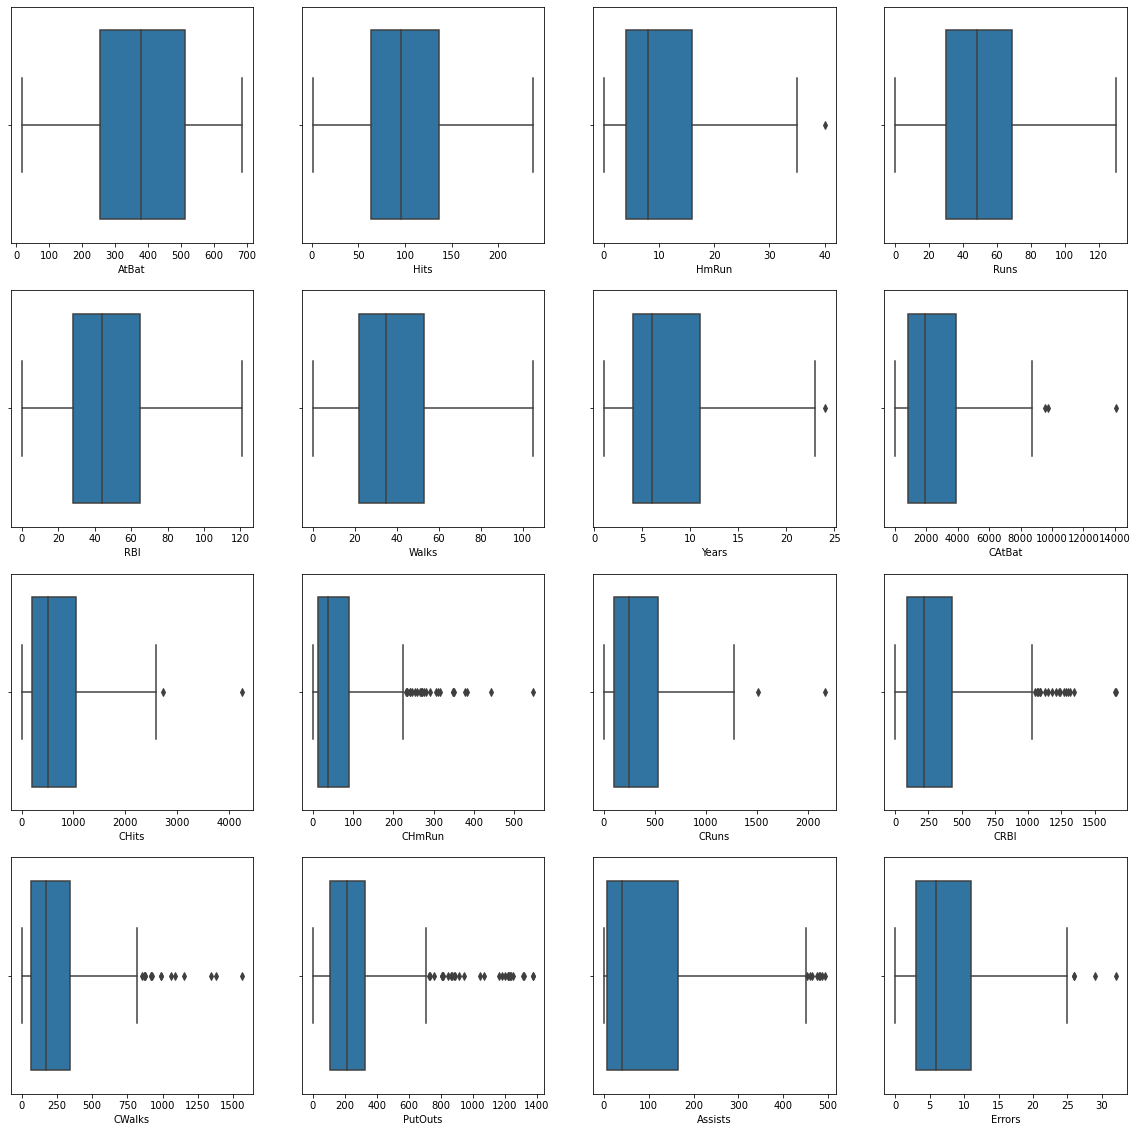

In [72]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes(int).columns:
    index += 1
    plt.subplot(4,4,index)
    sns.boxplot(df.select_dtypes([float, int])[i], whis=1.8)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [77]:
for i in df.select_dtypes(int).columns:
    if i == "HmRun" and i == "Years" and i == "CAtBat" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.7*IQR)
        ust_sinir = Q3+(1.7*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
        
    elif  i == "CHits" and i == "CHmRun" and i == "CRuns" and i == "CRBI" and i == "Errors":
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3-Q1
            alt_sinir = Q1-(1.8*IQR)
            ust_sinir = Q3+(1.8*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
            aykiri_alt = df[i] < alt_sinir
            aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
            df[i][aykiri_alt] = alt_sinir
            df[i][aykiri_ust] = ust_sinir
    
    else : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.9*IQR)
        ust_sinir = Q3+(1.9*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir

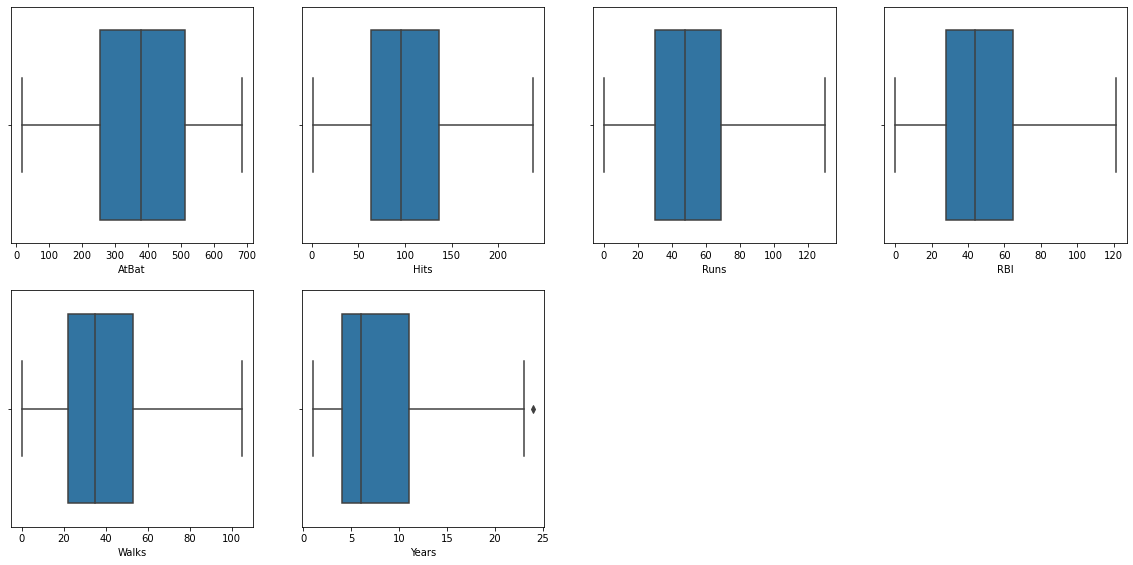

In [78]:
index = 0
plt.figure(figsize=(20,20))
for i in df.select_dtypes(int).columns:
    index += 1
    plt.subplot(4,4,index)
    sns.boxplot(df.select_dtypes([float, int])[i], whis=1.8)

<AxesSubplot:xlabel='PutOuts'>

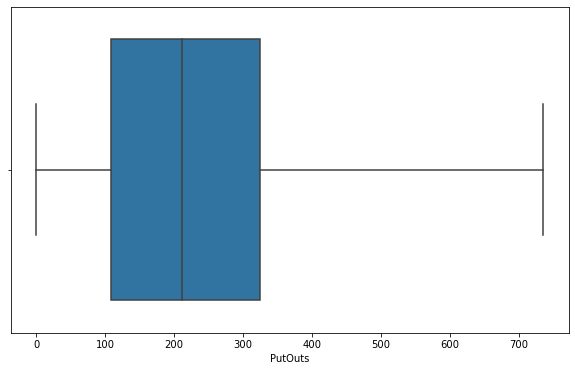

In [79]:
sns.boxplot(df["PutOuts"], whis=1.9);

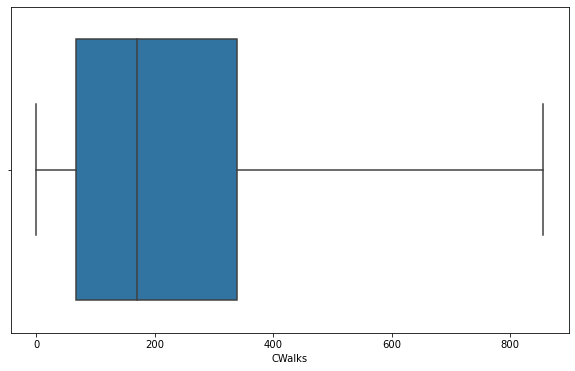

In [80]:
sns.boxplot(df["CWalks"], whis=1.9);

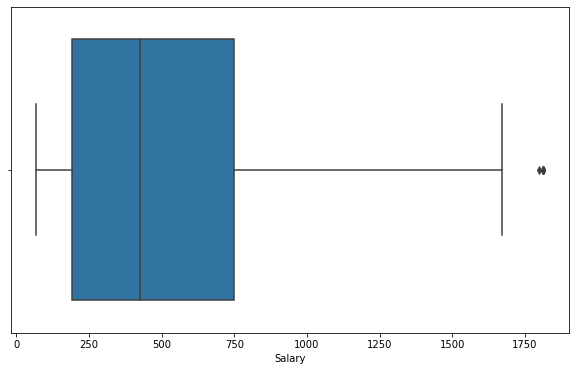

In [85]:
sns.boxplot(df["Salary"], whis=1.7);

In [86]:
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1-(1.7*IQR)
ust_sinir = Q3+(1.7*IQR)
aykiri_alt = df["Salary"] < alt_sinir
aykiri_ust = df["Salary"] > ust_sinir
df["Salary"][aykiri_alt] = alt_sinir
df["Salary"][aykiri_ust] = ust_sinir

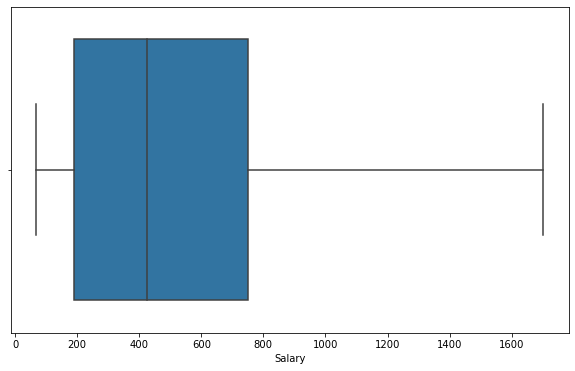

In [87]:
sns.boxplot(df["Salary"], whis=1.7);

In [91]:
print(f"aykırı alt değer = {alt_sinir}")
print(f"aykırı üst değer = {ust_sinir}")

aykırı alt değer = -762.0
aykırı üst değer = 1702.0


In [95]:
ort = (ust_sinir + alt_sinir)/2
ort

470.0

In [93]:
for i in df.select_dtypes(float).columns[0: ]:
    df[i].fillna(ort, inplace=True)

In [94]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [96]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [97]:
from sklearn.preprocessing import OrdinalEncoder

cat = X.select_dtypes("object").columns
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state= 101)

In [98]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
313,580,207,8.000,107,71,105,5,2778.000,978.000,32.000,474.000,322.000,417.000,0.000,0.000,121.000,267.000,19.000,0.000
240,271,77,5.000,35,29,33,12,4933.000,1358.000,48.000,630.000,435.000,403.000,0.000,1.000,62.000,90.000,3.000,0.000
193,199,52,9.000,26,28,21,6,805.000,191.000,30.000,113.000,119.000,87.000,1.000,1.000,235.000,22.000,5.000,1.000
168,315,73,5.000,23,37,16,4,450.000,108.000,6.000,38.000,46.000,28.000,0.000,1.000,227.000,15.000,3.000,0.000
316,221,53,2.000,21,23,22,8,1063.000,283.000,15.000,107.000,124.000,106.000,1.000,0.000,325.000,58.000,6.000,1.000


In [99]:
X_train.shape

(257, 19)

In [100]:
X_test.shape

(65, 19)

In [101]:
X_test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
167,404,92,11.000,54,49,18,6,1354.000,325.000,30.000,188.000,135.000,63.000,0.000,0.000,222.000,5.000,5.000,0.000
48,542,140,12.000,46,75,41,16,7099.000,2130.000,234.400,987.000,1067.500,431.000,0.000,0.000,697.000,61.000,9.000,0.000
298,181,46,1.000,19,18,17,5,937.000,238.000,9.000,88.000,95.000,104.000,0.000,0.000,37.000,98.000,9.000,0.000
19,127,32,8.000,16,22,14,8,727.000,180.000,24.000,67.000,82.000,56.000,1.000,1.000,202.000,22.000,2.000,1.000
98,415,115,27.000,97,71,68,3,711.000,184.000,45.000,156.000,119.000,99.000,1.000,1.000,274.000,2.000,7.000,1.000


In [102]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
gr_model = GradientBoostingRegressor(random_state=101)
gr_model.fit(X_train, y_train)
train_val(gr_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.963,0.152
mae,60.210,182.095
mse,5692.055,60387.928
rmse,75.446,245.740


In [107]:
from sklearn.model_selection import cross_validate

model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                                 0.462
test_neg_mean_absolute_error         -189.061
test_neg_mean_squared_error        -75864.760
test_neg_root_mean_squared_error     -268.759
dtype: float64

In [108]:
model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_test, y_test, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                                -0.250
test_neg_mean_absolute_error         -188.285
test_neg_mean_squared_error        -50757.923
test_neg_root_mean_squared_error     -217.366
dtype: float64

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 200, 300, 500, 1000], "subsample":[0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.001, 0.01, 0.1, 0.2], 'max_depth':[2,3, 5, 8, 50, 100]}

model = GradientBoostingRegressor(random_state=101)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 5, 8, 50, 100],
                         'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 500, 1000],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [110]:
grid_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'max_features': 2,
 'n_estimators': 500,
 'subsample': 0.8}

In [111]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999,0.245
mae,11.294,166.010
mse,190.515,53729.119
rmse,13.803,231.795
